In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU
from tensorflow.keras.preprocessing import sequence

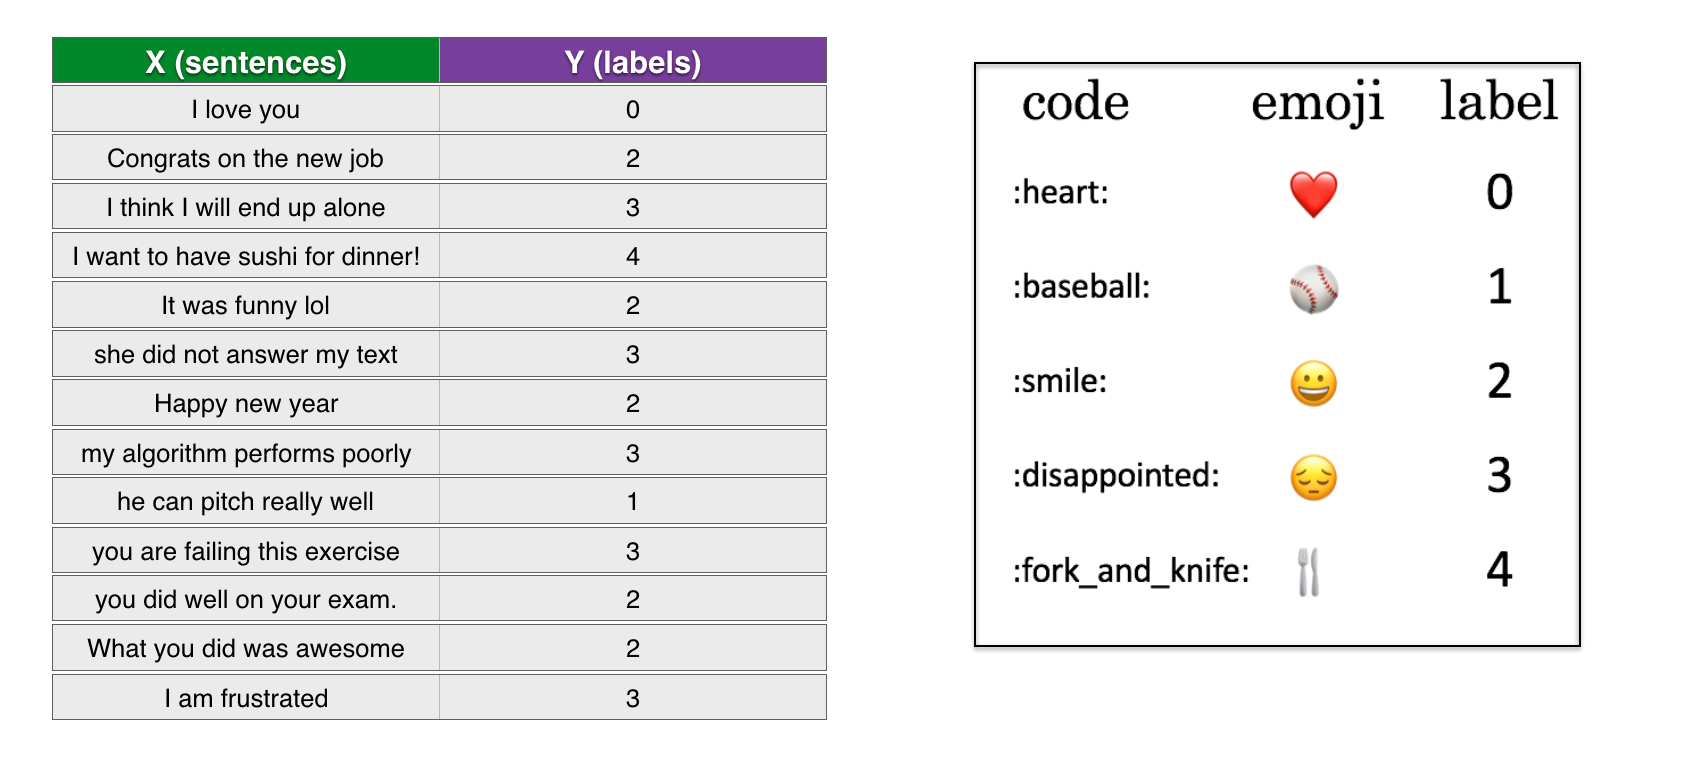

In [2]:
def read_csv(filename):
  data_frame=pd.read_csv(filename)
  X=np.asarray(data_frame['sentence'])
  Y=np.asarray(data_frame['label'],dtype=int)
  return X,Y

In [3]:
X_train,Y_train=read_csv("/content/drive/MyDrive/Emoji_Text_Classification/train.csv")
X_test,Y_test=read_csv("/content/drive/MyDrive/Emoji_Text_Classification/test.csv")

In [4]:
def label_to_emoji(label):
  emojies=["❤️",'⚽','😂','😔','🍽️']
  return emojies[label]

In [5]:
index = 4
print(X_train[index],label_to_emoji(Y_train[index]))

food is life 🍽️


In [6]:
max_len = len(max(X_train,key=len).split())
max_len

10

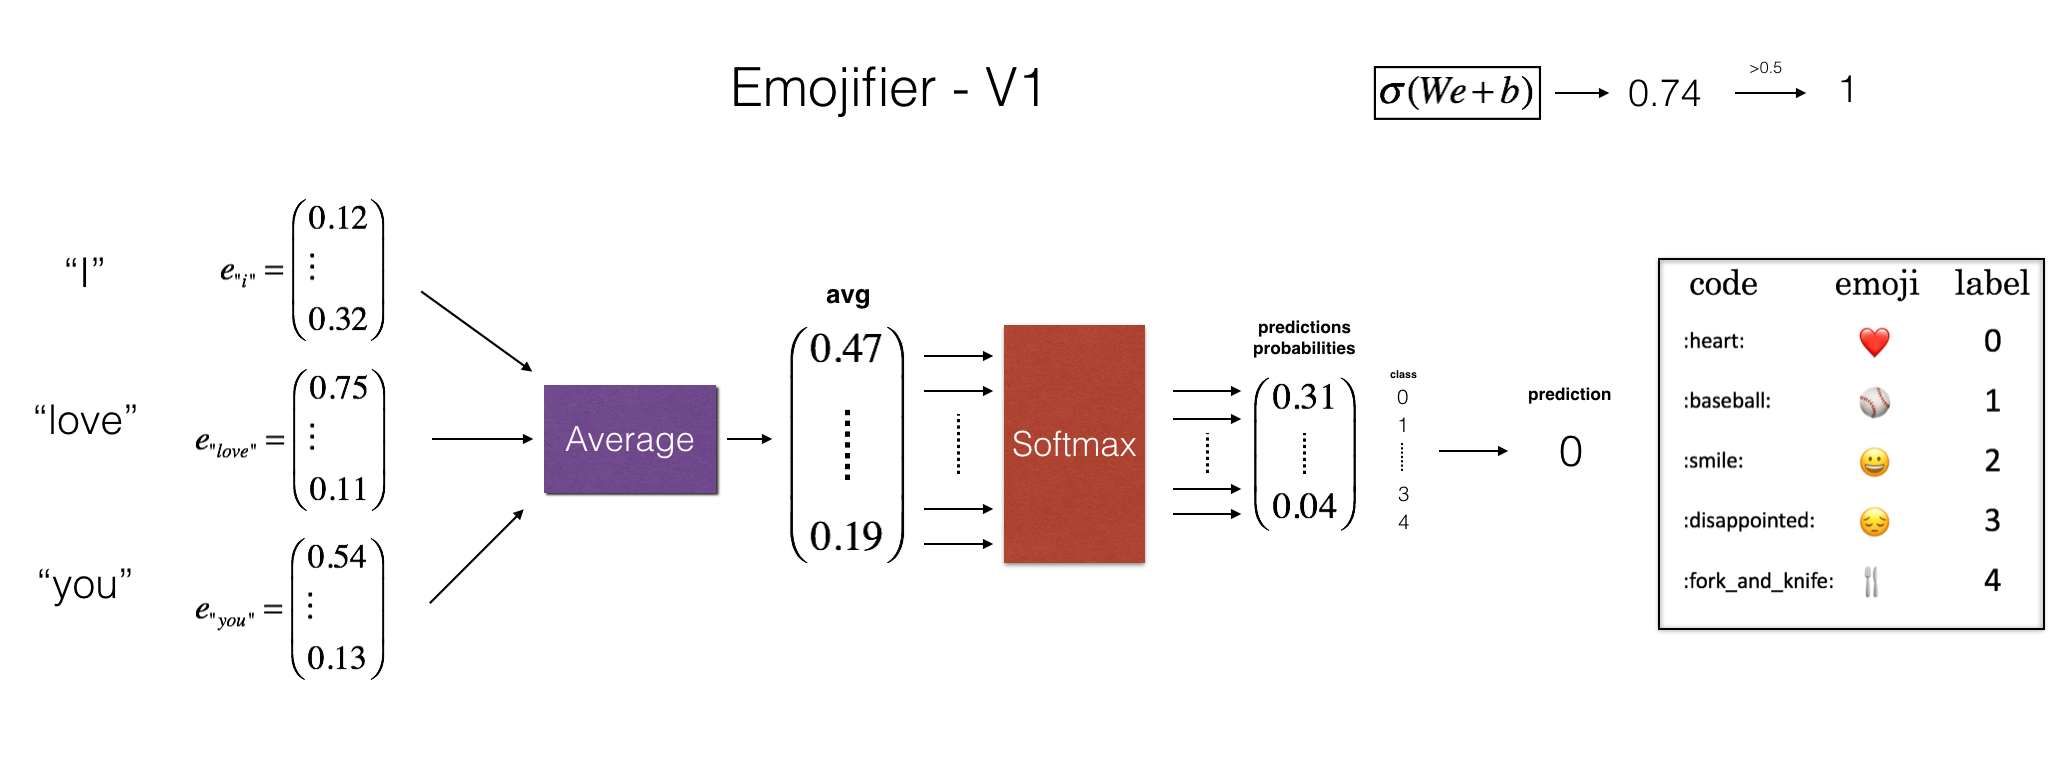

In [7]:
Y_train_oh = tf.keras.utils.to_categorical(Y_train, 5)
Y_test_oh = tf.keras.utils.to_categorical(Y_test, 5)

In [ ]:
Y_train_oh

In [9]:
index=4
print(Y_train[index],"is converted into one hot",Y_train_oh[index])

4 is converted into one hot [0. 0. 0. 0. 1.]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glov.6B

In [11]:
def read_glove_vectors(glove_file):
  f = open(glove_file , encoding = 'utf8')
  words = set()
  words_to_vec = dict()
  
  for line in f:
    line = line.strip().split()
    word = line[0]
    vec = line[1:]
    words.add(word)
    words_to_vec[word] = np.array(vec, dtype=np.float64)
  return words_to_vec

In [12]:
words_to_vec=read_glove_vectors("/content/drive/MyDrive/glov.6B/glove.6B.50d.txt")

In [13]:
words_to_vec["air"]

array([ 0.62431 , -0.23979 ,  0.21777 , -0.21323 , -0.45305 , -1.0299  ,
       -0.19855 ,  0.13059 ,  0.92624 , -0.83971 ,  0.8806  ,  0.066207,
        0.16236 ,  0.96066 , -0.93798 ,  0.31745 , -0.63045 ,  0.69121 ,
       -1.906   , -0.87243 ,  0.47022 ,  0.36317 ,  0.16189 , -0.63524 ,
       -0.58182 , -1.8385  , -0.12382 ,  0.83272 ,  0.98049 ,  0.7881  ,
        3.0484  ,  0.54869 , -0.52357 , -0.31664 ,  0.21104 ,  0.038831,
        0.40715 , -0.27261 , -0.28817 ,  0.7642  ,  0.42462 ,  0.75423 ,
        0.61254 , -0.71756 , -0.23384 ,  0.36531 , -0.24062 , -0.1812  ,
       -0.89576 ,  0.77999 ])

In [14]:
def sentence_to_avg(sentence):
  words = sentence.lower().split()
  sum_vectors = np.zeros((50,))
  
  for w in words:
    sum_vectors += words_to_vec[w]

  avg_vectors = sum_vectors / len(words)
  return avg_vectors

In [15]:
sentence_to_avg("moon is biutiful")

array([ 0.48488667,  0.72419667, -0.20391333,  0.10962333,  0.13898333,
       -0.20297   ,  0.0510213 , -0.22280667,  0.31022667,  0.44025   ,
        0.36413   ,  0.58045   ,  0.174757  ,  0.62120333,  0.15245367,
       -0.03673   ,  0.38547   ,  0.2103422 , -0.19375667,  0.26828667,
       -0.6592    , -0.25526   ,  0.464872  ,  0.04264   ,  0.47324667,
       -0.66509333, -0.34334267,  0.67942   , -0.088681  , -0.10454233,
        1.47816667, -0.46521667, -0.43116767,  0.06044667, -0.23709167,
       -0.40871667,  0.14627033, -0.25918   , -0.35041   , -0.03311   ,
       -0.43355433,  0.14046267, -0.17783667, -0.736607  ,  0.00997533,
       -0.33371667,  0.05523667, -0.28656367,  0.2522    ,  0.28296667])

In [16]:
X_train_avg = []

for i in range(X_train.shape[0]):
  X_train_avg.append(sentence_to_avg(X_train[i]))

X_train_avg = np.array(X_train_avg)

In [17]:
print(X_train_avg.shape)
print(Y_train_oh.shape)

(132, 50)
(132, 5)


In [18]:
class EmojiNet_V1(Model):
  def __init__(self):
    super().__init__()
    self.dense = Dense(5, input_shape=(50,), activation='softmax')

  def call(self, x):
    x = self.dense(x)
    return x

In [19]:
model_V1=EmojiNet_V1()

In [20]:
model_V1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_V1.fit(X_train_avg, Y_train_oh, epochs=400, shuffle=True)

In [22]:
X_test_avg = []
for i in range(X_test.shape[0]):
    X_test_avg.append(sentence_to_avg(X_test[i]))

X_test_avg = np.array(X_test_avg)

In [23]:
model_V1.evaluate(X_test_avg, Y_test_oh)


2/2 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.8393


[0.6331566572189331, 0.8392857313156128]

In [24]:
X_me = np.array([ "i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy and funny","not sad"])
Y_me = np.array([[0], [0],  [2], [1], [4], [3],[2]])

X_me_avg = []
for x in X_me:
    X_me_avg.append(sentence_to_avg(x))

X_me_avg = np.array(X_me_avg)
pred = model_V1.predict(X_me_avg)

for i in range(X_me.shape[0]):
    print(X_me[i], label_to_emoji(np.argmax(pred[i])))



1/1 [==============================] - 0s 66ms/step
i adore you ❤️
i love you ❤️
funny lol 😂
lets play with a ball ⚽
food is ready 🍽️
not feeling happy and funny 😂
not sad 😔


#Emojifier version2 using RNN

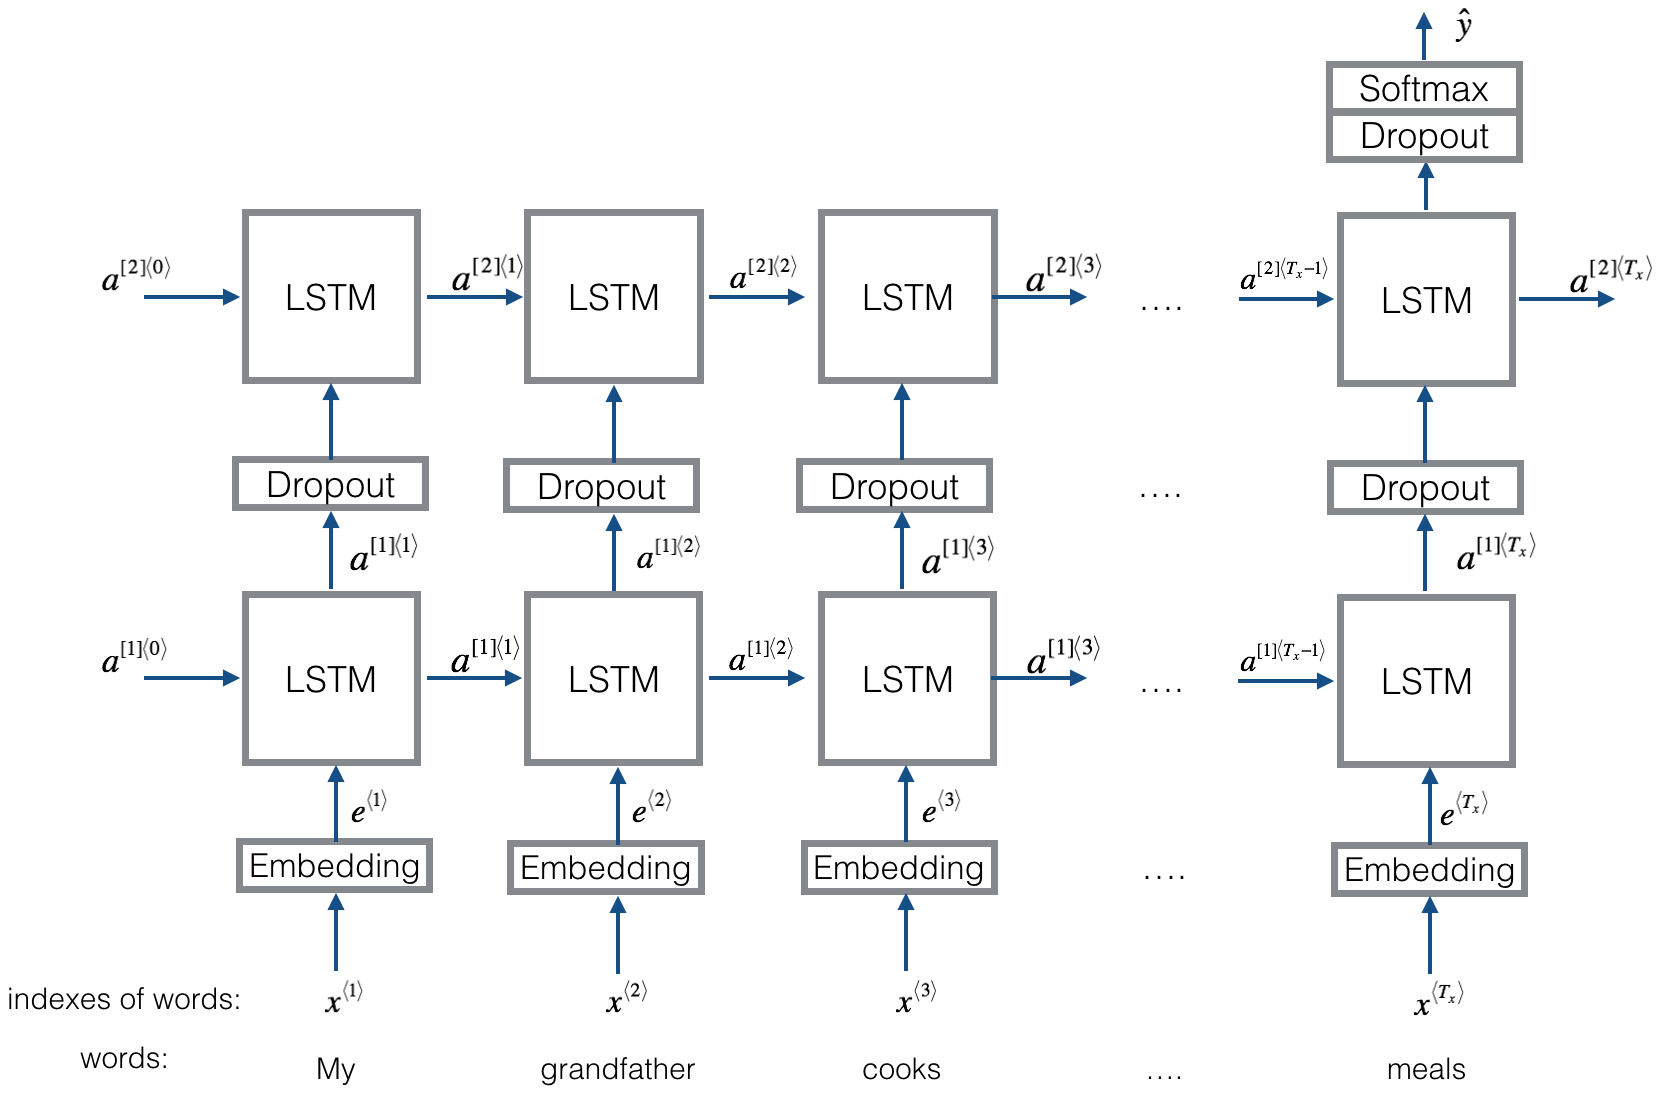

In [129]:
class EmojiNet_V2(Model):
    def __init__(self):
        super().__init__()
        
        self.lstm_1 = LSTM(128, return_sequences=True)
        self.dropout_1 = Dropout(0.5)
        self.lstm_2 = LSTM(64)
        self.dropout_2 = Dropout(0.5)
        self.dense = Dense(5, activation='softmax')

    def call(self, x):
        x = self.lstm_1(x)
        x = self.dropout_1(x)
        x = self.lstm_2(x)
        x = self.dropout_2(x)
        x = self.dense(x)
        return x

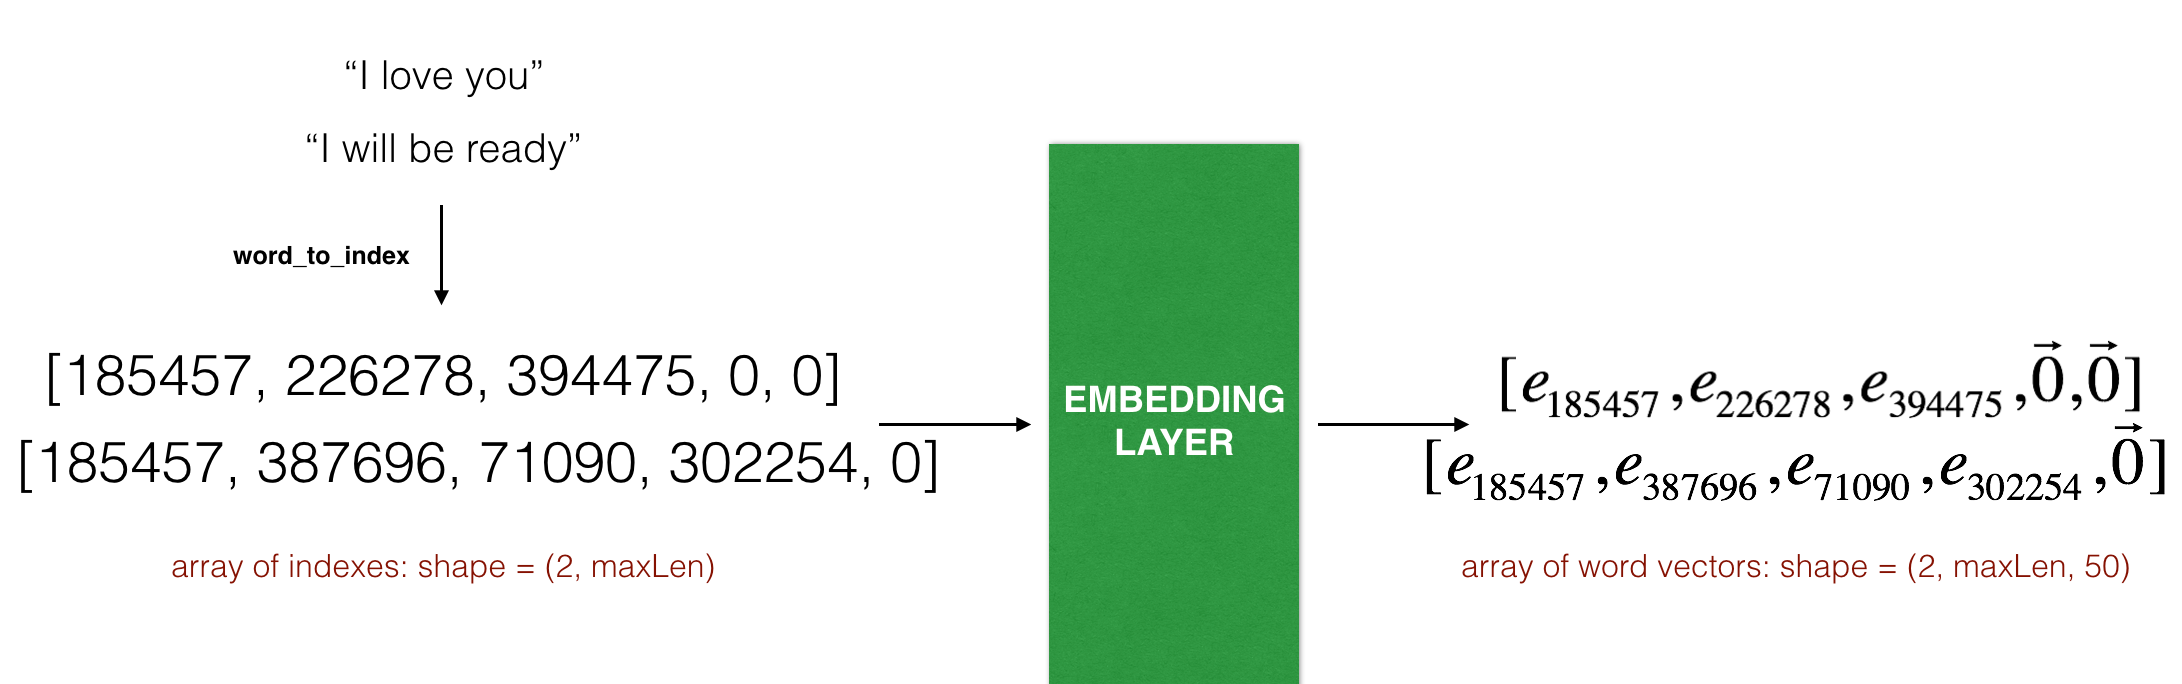

In [130]:
def convert_sentence_to_embeddings(X):
  emb_matrix = np.zeros((X.shape[0], #size of dataset
                        10, # len of longest sentence
                        50 # size of emmbedings vector
                        ))
  for i in range(X.shape[0]):
      words = X[i].lower().split()

      for j in range(len(words)):
          emb_matrix[i,j,:] = words_to_vec[words[j]]
          
  return emb_matrix

In [131]:
x_me = np.array(["funny lol","lets play baseball" , "food is ready for you"])
print(convert_sentence_to_embeddings(x_me))

[[[-0.014547 -0.20208  -0.75278  ... -0.13429   0.21133   1.5368  ]
  [-0.54289   0.053743 -0.46978  ...  0.20745  -0.074958  0.080575]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  ...
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]]

 [[ 0.30423  -0.24405   1.0303   ... -0.43296  -0.096168  0.43463 ]
  [-0.73571   0.19937  -0.89408  ... -0.075279 -0.44448   0.47437 ]
  [-1.9327    1.0421   -0.78515  ...  0.55667  -0.70315   0.17157 ]
  ...
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]
  [ 0.        0.        0.       ...  0.        0.        0.      ]]

 [[ 0.47222  -0.44545  -0.51833  ...  0.34932   0.33934   0.25499 ]
  [ 0.6185    0.64254  -0.46552  ... -0.27557   0.30899   0.48497 ]
  [ 0.36825  -0.20512   0.36656 

In [132]:
X_train_emb = convert_sentence_to_embeddings(X_train)
X_train_emb.shape

(132, 10, 50)

In [133]:
model_V2 = EmojiNet_V2()
model_V2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_V2.fit(X_train_emb, Y_train_oh, epochs = 80, batch_size = 8, shuffle = True)

In [135]:
X_test_emb = convert_sentence_to_embeddings(X_test)
Y_test_oh = tf.keras.utils.to_categorical(Y_test, 5)
model_V2.evaluate(X_test_emb ,Y_test_oh)

2/2 [==============================] - 1s 9ms/step - loss: 0.6397 - accuracy: 0.9107


[0.6397473216056824, 0.9107142686843872]

In [136]:

X_me = np.array([ "i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy and funny","not sad"])
Y_me = np.array([[0], [0],  [2], [1], [4], [3],[2]])

X_me_emb = convert_sentence_to_embeddings(X_me)

pred = model_V2.predict(X_me_emb)

for i in range(X_me.shape[0]):
    print(X_me[i], label_to_emoji(np.argmax(pred[i])))

1/1 [==============================] - 1s 686ms/step
i adore you ❤️
i love you ❤️
funny lol 😂
lets play with a ball ⚽
food is ready 🍽️
not feeling happy and funny 😂
not sad 😔


Emojifier v3

In [145]:
class EmojiNet_V3(Model):
    def __init__(self):
        super().__init__()
        
        self.gru_1 = GRU(256, return_sequences=True)
        self.dropout_1 = Dropout(0.5)

        self.gru_2 = GRU(32)
        self.dropout_2 = Dropout(0.5)



        self.dense = Dense(5, activation='softmax')

    def call(self, x):
        x = self.gru_1(x)
        x = self.dropout_1(x)

        x = self.gru_2(x)
        x = self.dropout_2(x)




        x = self.dense(x)
        return x

In [146]:
model_V3 = EmojiNet_V3()
model_V3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model_V3.fit(X_train_emb, Y_train_oh, epochs = 80, batch_size = 8, shuffle = True)

Epoch 1/80
17/17 [==============================] - 3s 6ms/step - loss: 1.6166 - accuracy: 0.1970
Epoch 2/80
17/17 [==============================] - 0s 6ms/step - loss: 1.5835 - accuracy: 0.2652
Epoch 3/80
17/17 [==============================] - 0s 6ms/step - loss: 1.5593 - accuracy: 0.2955
Epoch 4/80
17/17 [==============================] - 0s 6ms/step - loss: 1.5267 - accuracy: 0.3106
Epoch 5/80
17/17 [==============================] - 0s 6ms/step - loss: 1.5229 - accuracy: 0.2652
Epoch 6/80
17/17 [==============================] - 0s 6ms/step - loss: 1.4969 - accuracy: 0.3636
Epoch 7/80
17/17 [==============================] - 0s 6ms/step - loss: 1.4764 - accuracy: 0.3409
Epoch 8/80
17/17 [==============================] - 0s 6ms/step - loss: 1.4574 - accuracy: 0.4015
Epoch 9/80
17/17 [==============================] - 0s 7ms/step - loss: 1.4265 - accuracy: 0.4242
Epoch 10/80
17/17 [==============================] - 0s 6ms/step - loss: 1.4470 - accuracy: 0.4015
Epoch 11/80
17/17 [

In [147]:
X_test_emb = convert_sentence_to_embeddings(X_test)
Y_test_oh = tf.keras.utils.to_categorical(Y_test, 5)
model_V3.evaluate(X_test_emb ,Y_test_oh)

2/2 [==============================] - 1s 9ms/step - loss: 0.3730 - accuracy: 0.8929


[0.37300825119018555, 0.8928571343421936]

In [148]:

X_me = np.array([ "i adore you", "i love you", "very cool ", "lets play soccer", "breakfast is ready", "not feeling happy and funny","not sad"])
Y_me = np.array([[0], [0],  [2], [1], [4], [3],[2]])

X_me_emb = convert_sentence_to_embeddings(X_me)

pred = model_V3.predict(X_me_emb)

for i in range(X_me.shape[0]):
    print(X_me[i], label_to_emoji(np.argmax(pred[i])))

1/1 [==============================] - 1s 594ms/step
i adore you ❤️
i love you ❤️
very cool  😂
lets play soccer ⚽
breakfast is ready 🍽️
not feeling happy and funny 😂
not sad 😔
